# Download and extract data
Download [the dataset](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip). This is a pickled dataset in which we've already resized the images to 32x32.

In [1]:
import requests
# Download data
url = 'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip'
r = requests.get(url, allow_redirects=True)
 
open('traffic-signs-data.zip', 'wb').write(r.content)

123524425

In [2]:
import zipfile
# Unzip File
path_to_zip_file = 'traffic-signs-data.zip'
directory_to_extract_to = 'data/'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

# Load pickled data

In [144]:
import pickle
import numpy as np
 
training_file = 'data/train.p'
validation_file= 'data/valid.p'
testing_file = 'data/test.p'
 
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
# The data is already splitted to train/validation but I joined them together to process them as a one array then to be splitted.    
X_train, y_train = np.concatenate((train['features'],valid['features'])),np.concatenate((train['labels'],valid['labels']))
X_test, y_test = test['features'], test['labels']

In [4]:
assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))
print("Number of training examples =", len(X_train))
print("Number of testing examples =", len(X_test))
print("Image data shape =", X_train[0].shape)
print("Number of classes =", len(np.unique(y_train)))

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [5]:
import pandas as pd
signNames = pd.read_csv ('signnames.csv')
df = pd.DataFrame(signNames)
df

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [164]:
print(df.values[0][1])

Speed limit (20km/h)


# Visualizing Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


done


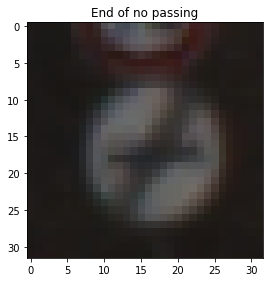

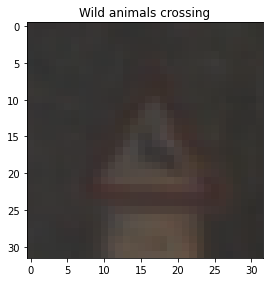

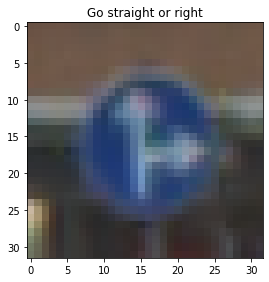

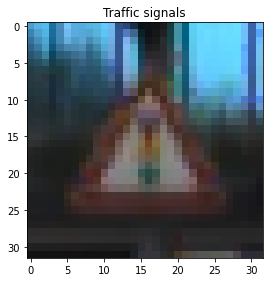

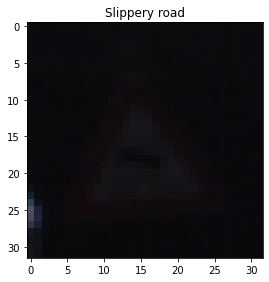

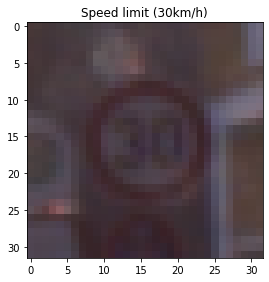

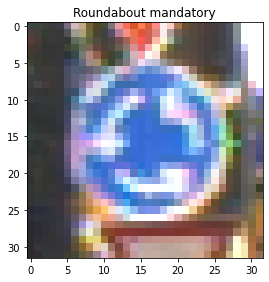

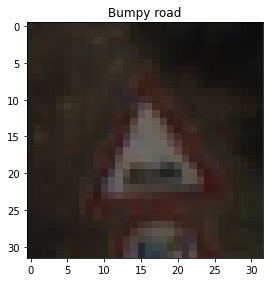

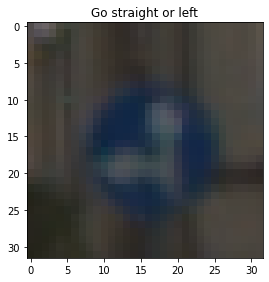

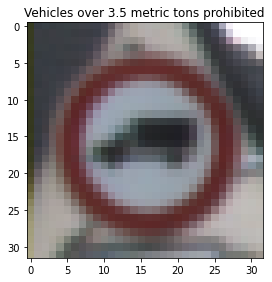

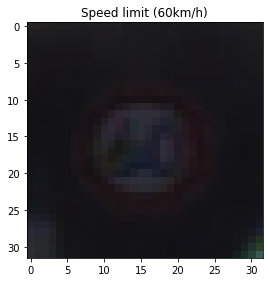

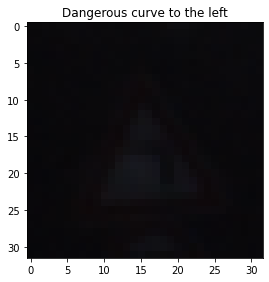

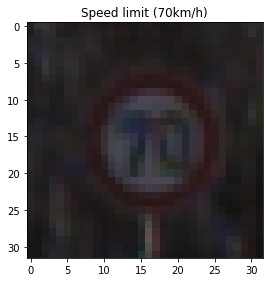

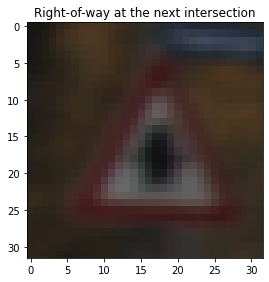

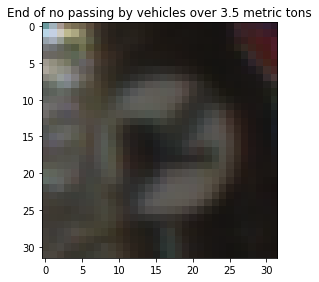

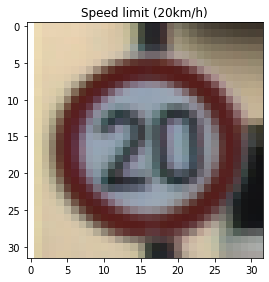

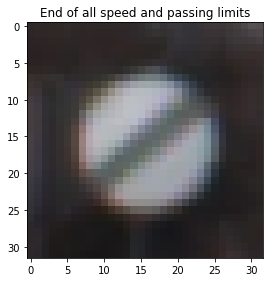

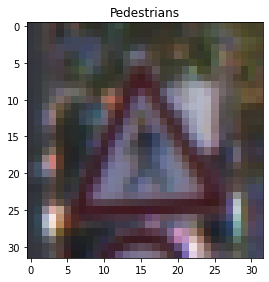

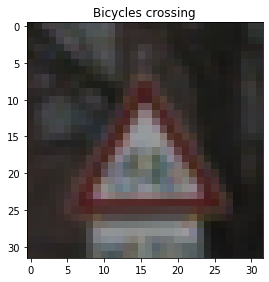

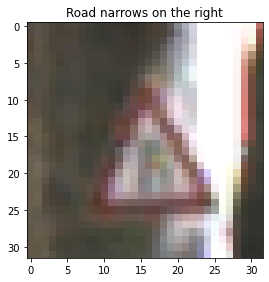

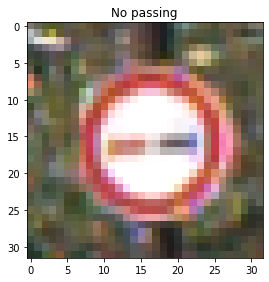

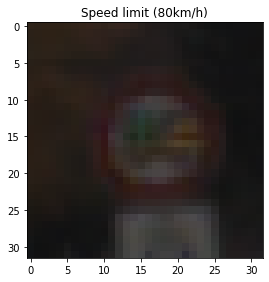

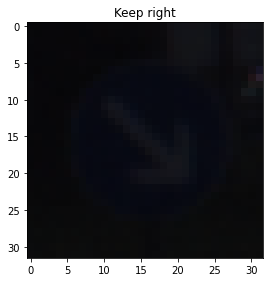

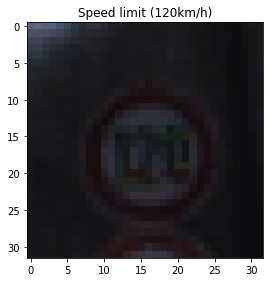

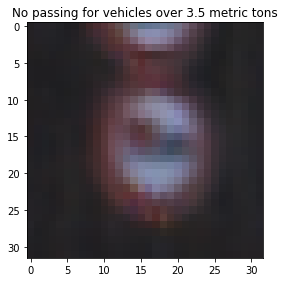

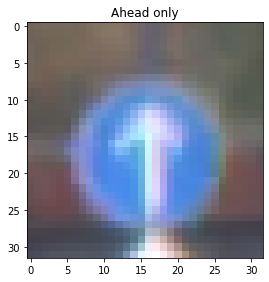

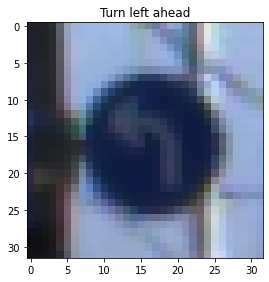

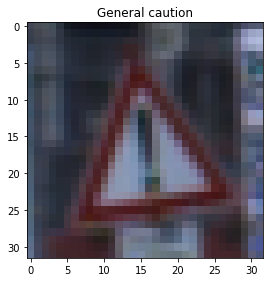

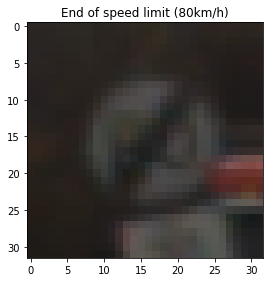

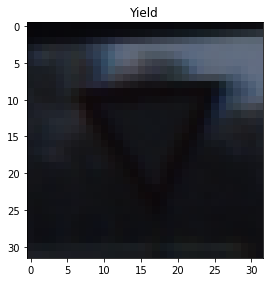

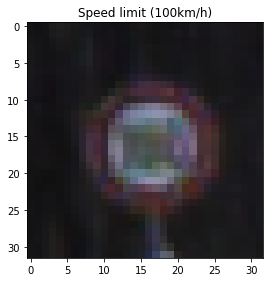

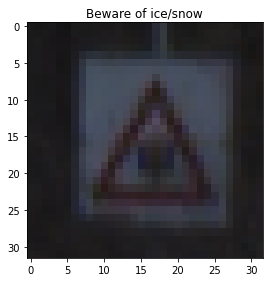

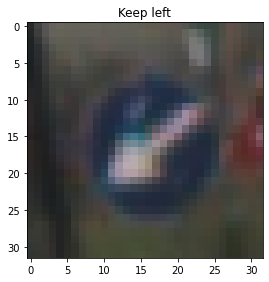

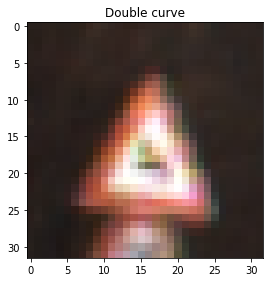

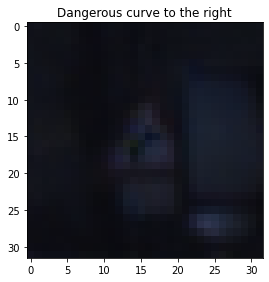

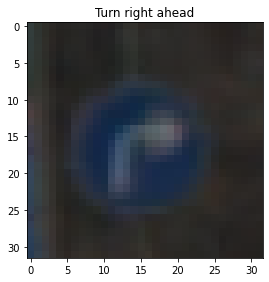

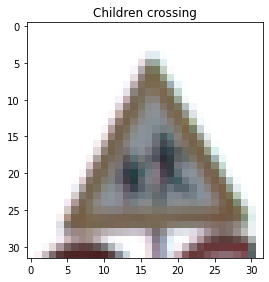

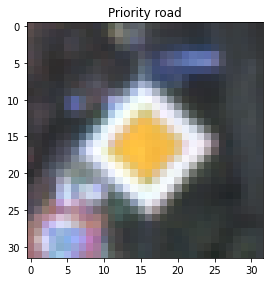

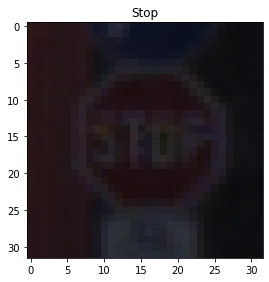

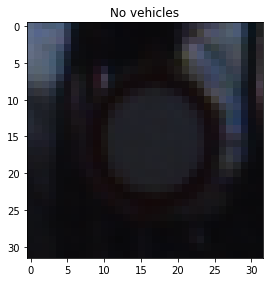

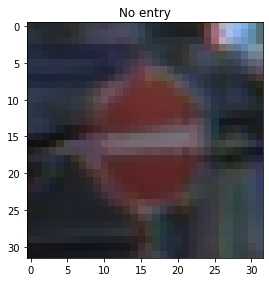

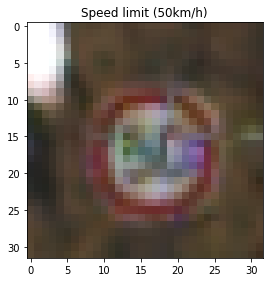

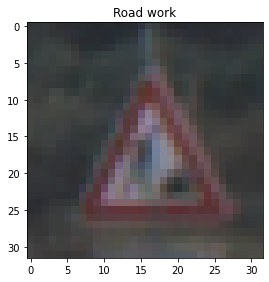

In [6]:
import matplotlib.pyplot as plt
import cv2
 
checked = []
for i in range(len(X_train)):
  if (len(checked)==43):
    print("done")
    break;
  if (y_train[i] in checked):
    continue
  else:
    f, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
    f.tight_layout()
    checked.append(y_train[i])
    ax1.imshow(X_train[i])
    ax1.set_title("{}".format(signNames.values[y_train[i]][1]), fontsize=12)

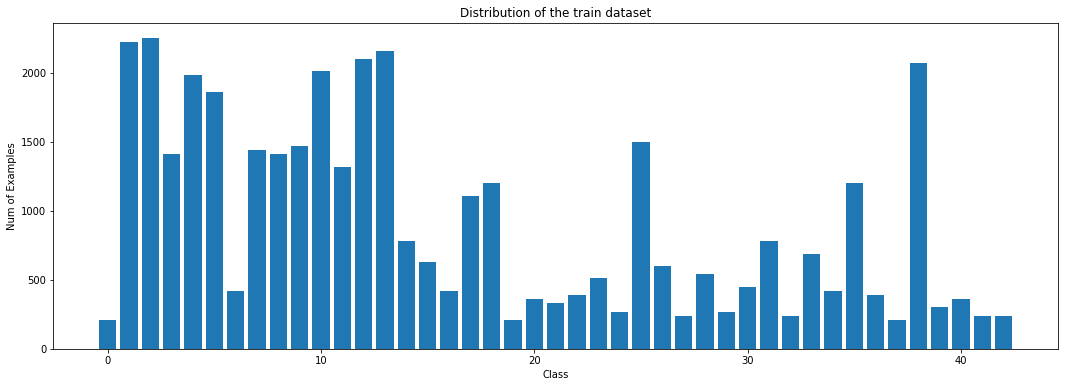

In [7]:
# Plot image type distribution

def plot_examples_per_class(labels_):
    values, counts = np.unique(labels_, return_counts=True)
    plt.figure(figsize=(18, 6))
    plt.bar(values, counts)
    plt.ylabel('Num of Examples')
    plt.xlabel('Class')
    plt.title("Distribution of the train dataset")
    
plot_examples_per_class(y_train)

# Data Augmentation

In [8]:
def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img


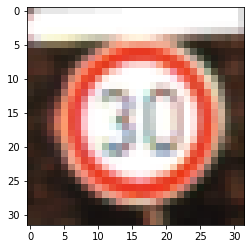

In [9]:
# Example image Without transformation
image_num=3000
image = X_train[image_num,:,:,:]
image = transform_image(image,0,0,0)
plt.imshow(image);

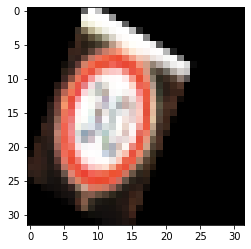

In [10]:
# Example image with transformation
image_num=3000
image = X_train[image_num,:,:,:]
image = transform_image(image,10,10,10)
plt.imshow(image);

In [71]:
values, counts = np.unique(y_train, return_counts=True) 
print(values)
print(counts.max())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
2250


In [74]:
values, counts = np.unique(y_train, return_counts=True) 
max_counts = counts.max() 
num_img_needed = []
first_examples = []
class_s = []
for class_ in values:

  print('working on class #', class_, '...')

  num_img_needed.append(max_counts-counts[class_])

  first_example_index = next(index for index, val in enumerate(y_train) if val==class_)
  print(first_example_index)
  first_examples.append(X_train[first_example_index])

  class_ = class_.reshape([1])
  class_s.append(class_)

working on class # 0 ...
9960
working on class # 1 ...
2220
working on class # 2 ...
31439
working on class # 3 ...
5370
working on class # 4 ...
6810
working on class # 5 ...
12360
working on class # 6 ...
21450
working on class # 7 ...
23730
working on class # 8 ...
15870
working on class # 9 ...
11040
working on class # 10 ...
17130
working on class # 11 ...
8580
working on class # 12 ...
27329
working on class # 13 ...
21810
working on class # 14 ...
29219
working on class # 15 ...
29909
working on class # 16 ...
5010
working on class # 17 ...
30449
working on class # 18 ...
20370
working on class # 19 ...
6630
working on class # 20 ...
25950
working on class # 21 ...
25680
working on class # 22 ...
4500
working on class # 23 ...
1770
working on class # 24 ...
10800
working on class # 25 ...
33449
working on class # 26 ...
1230
working on class # 27 ...
10350
working on class # 28 ...
26849
working on class # 29 ...
10560
working on class # 30 ...
25020
working on class # 31 ...
21

In [145]:
for num in range(0,len(num_img_needed)):
  print('working on class #', num, '...')
  for i in range(500): ## add 500 instances of augmented data
    transformed_example = transform_image(first_examples[num],5,5,5)
    transformed_example = transformed_example.reshape([1, 32, 32, 3])
    X_train = np.concatenate([X_train, transformed_example])
    y_train = np.concatenate([y_train, class_s[num]])

working on class # 0 ...
working on class # 1 ...
working on class # 2 ...
working on class # 3 ...
working on class # 4 ...
working on class # 5 ...
working on class # 6 ...
working on class # 7 ...
working on class # 8 ...
working on class # 9 ...
working on class # 10 ...
working on class # 11 ...
working on class # 12 ...
working on class # 13 ...
working on class # 14 ...
working on class # 15 ...
working on class # 16 ...
working on class # 17 ...
working on class # 18 ...
working on class # 19 ...
working on class # 20 ...
working on class # 21 ...
working on class # 22 ...
working on class # 23 ...
working on class # 24 ...
working on class # 25 ...
working on class # 26 ...
working on class # 27 ...
working on class # 28 ...
working on class # 29 ...
working on class # 30 ...
working on class # 31 ...
working on class # 32 ...
working on class # 33 ...
working on class # 34 ...
working on class # 35 ...
working on class # 36 ...
working on class # 37 ...
working on class # 38 

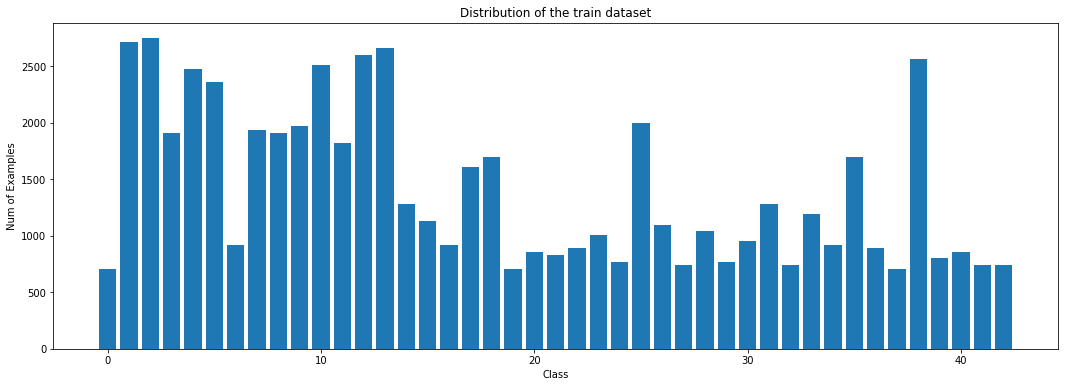

In [146]:
plot_examples_per_class(y_train)

In [147]:
print(X_train.shape)
print(y_train.shape)

(60709, 32, 32, 3)
(60709,)


# Save Data for Easy Access

In [96]:
# import os

# pickle_file = 'transformed_data_2.pickle'

# if not os.path.isfile(pickle_file):

#   print('Saving data to pickle file...')
#   try:
#       with open('transformed_data_2.pickle', 'wb') as pfile:
#           pickle.dump(
#               {
#                   'X_train': X_train,
#                   'y_train': y_train,
#               },
#               pfile, pickle.HIGHEST_PROTOCOL)
#   except Exception as e:
#       print('Unable to save data to', pickle_file, ':', e)
#       raise

#   print('Data cached in pickle file.')

Saving data to pickle file...
Data cached in pickle file.


 # Reload Data

In [134]:
# pickle_file = 'transformed_data_2.pickle'
# with open(pickle_file, 'rb') as f:
#     pickle_data = pickle.load(f)
#     X_train = pickle_data['X_train']
#     y_train = pickle_data['y_train']
#     #del pickle_data  # Free up memory

# print('Data and modules loaded.')

Data and modules loaded.


In [148]:
print ("Number of training examples after image augument =",len(X_train))
print ("Number of testing examples after image augument =",len(X_test))
print ("Number of training labels after image augument =",len(y_train))
print ("Number of testing labels after image augument =",len(y_test))

Number of training examples after image augument = 60709
Number of testing examples after image augument = 12630
Number of training labels after image augument = 60709
Number of testing labels after image augument = 12630


In [79]:
import torch
import torchvision
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler
import random

# Convert to grayscale and Normalize


In [149]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

print(X_train_gray.shape)
print(X_test_gray.shape)

(60709, 32, 32, 1)
(12630, 32, 32, 1)


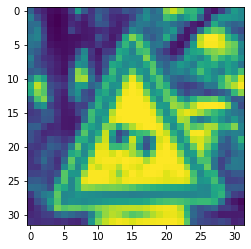

In [150]:
plt.imshow(X_train_gray[2020].squeeze());

In [151]:
X_train_normalized = X_train_gray/127.5-1
X_test_normalized = X_test_gray/127.5-1

# Create Datasets and Dataloaders

In [152]:
class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.data = torch.Tensor(data)
        self.data = self.data.permute(0, 3, 1, 2)
        print(self.data.shape)
        self.targets = torch.Tensor(targets)
 
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        return x,y
    def __len__(self):
        return len(self.data)

In [153]:
train_dataset = MyDataset(X_train_normalized,y_train)
test_dataset = MyDataset(X_test_normalized,y_test)

torch.Size([60709, 1, 32, 32])
torch.Size([12630, 1, 32, 32])


In [154]:
batch_size = 128
learning_rate = 0.00097  
epochs = 30
# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [86]:
def create_Dataloader(dataset, validation_split, batch_size, random_seed = 42):
  dataset_size = len(dataset)
 
  indices = list(range(dataset_size))
  split = int(np.floor(validation_split * dataset_size))
 
  if True :
      np.random.seed(random_seed)
      np.random.shuffle(indices)
 
  train_indices, val_indices = indices[split:], indices[:split]
 
  # Creating PT data samplers and loaders:
  train_sampler = SubsetRandomSampler(train_indices)
  valid_sampler = SubsetRandomSampler(val_indices)
 
  train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
  validation_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                                sampler=valid_sampler)
  print('Training set size: {}'.format(len(train_sampler)))
  print('Validation set size: {}'.format(len(valid_sampler)))

  return train_loader, validation_loader

In [155]:
train_loader,valid_loader = create_Dataloader(train_dataset, 0.2, batch_size)

Training set size: 48568
Validation set size: 12141


# Model Architecture

In [88]:
class LeNet_2(nn.Module):
    def __init__(self, in_channels=3, num_classes=43):
        super(LeNet_2, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=in_channels,
            out_channels=6,
            kernel_size=(5, 5),
            stride=(1, 1),
            padding=(1, 1),
        )
        self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.conv2 = nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=(5, 5),
            stride=(1, 1),
            padding=(1, 1),
        )
        self.fc1 = nn.Linear(6*6*16, 520)
        self.fc2 = nn.Linear(520,120)
        self.fc3 = nn.Linear(120,num_classes)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [156]:
model = LeNet_2(in_channels=1, num_classes=43).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Model

In [157]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
 
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
 
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
 
 
    model.train()
    return num_correct/num_samples
 
 
# Train Network
for epoch in range(epochs):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)
        targets = targets.long() 
        # forward
        #print(data.shape)
        #print(targets.shape)
        scores = model(data)
        loss = criterion(scores, targets)
 
        # backward
        optimizer.zero_grad()
        loss.backward()
 
        # gradient descent or adam step
        optimizer.step()
        training_loss += loss.data.item()
    training_loss /= len(train_loader)
    accuracy = check_accuracy(valid_loader,model)
    print(f"epochs : ",epoch)
    print(f"Training_loss : ",training_loss)
    print(f"Accuracy on Validation set: {accuracy*100:.2f}")
    print("*************")

epochs :  0
Training_loss :  2.087096072027558
Accuracy on Validation set: 73.31
*************
epochs :  1
Training_loss :  0.6163226144878488
Accuracy on Validation set: 88.91
*************
epochs :  2
Training_loss :  0.297251078447229
Accuracy on Validation set: 93.41
*************
epochs :  3
Training_loss :  0.18043559030874778
Accuracy on Validation set: 95.47
*************
epochs :  4
Training_loss :  0.11548100240822685
Accuracy on Validation set: 95.81
*************
epochs :  5
Training_loss :  0.08256599032565166
Accuracy on Validation set: 96.96
*************
epochs :  6
Training_loss :  0.06670682904996762
Accuracy on Validation set: 96.99
*************
epochs :  7
Training_loss :  0.05384769883791083
Accuracy on Validation set: 97.14
*************
epochs :  8
Training_loss :  0.03657738037015262
Accuracy on Validation set: 97.69
*************
epochs :  9
Training_loss :  0.03681869631461603
Accuracy on Validation set: 98.00
*************
epochs :  10
Training_loss :  0.026

# Analyze Performance

In [158]:
test_loader,_ = create_Dataloader(test_dataset, 0, batch_size)

Training set size: 12630
Validation set size: 0


In [160]:
accuracy = check_accuracy(test_loader,model)
print(f"Accuracy on Test set: {accuracy*100:.2f}")

Accuracy on Test set: 89.46


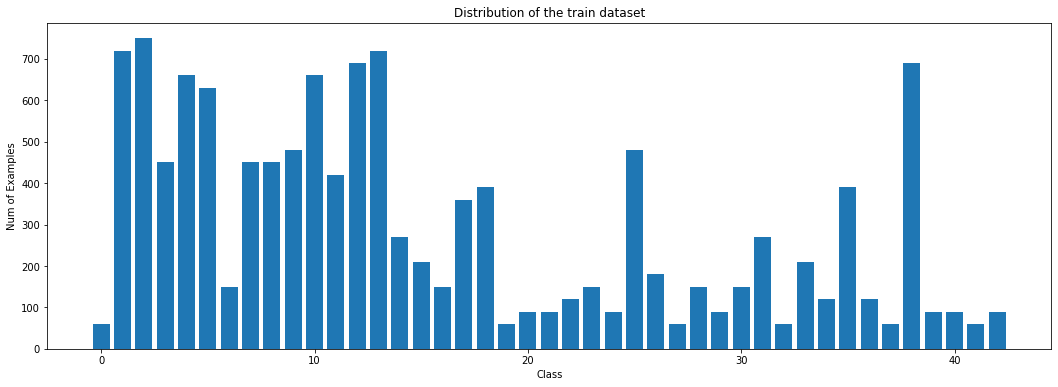

In [133]:
plot_examples_per_class(y_test) 

In [182]:
def preprocess(path):
  img = cv2.imread(path)
  img = cv2.resize(img,(32,32))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img
def predict(img,model,df=df,device=device):
  img = img.reshape([1,32,32,1])
  data = torch.Tensor(img)
  data = data.permute(0, 3, 1, 2)
  model.eval()
  data = data.to(device=device)
  scores = model(data)
  _, predictions = scores.max(1)
  return df.values[predictions][1]
paths = ['wild.jpg','wild2.jpg','wild3.jpg','wild4.jpg']
for path in paths:
  result = predict(preprocess(path),model)
  print(result)


Roundabout mandatory
No entry
Wild animals crossing
No passing


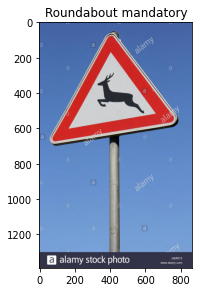

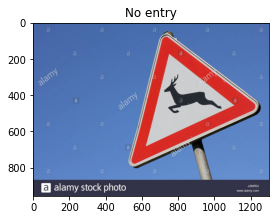

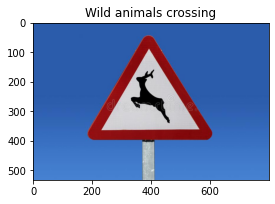

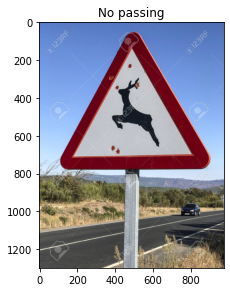

In [186]:
for path in paths:
  img = cv2.imread(path)
  f, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
  f.tight_layout()
  ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  ax1.set_title("{}".format(predict(preprocess(path),model)), fontsize=12)